In [1]:
# This is a Jupyter notebook loaded from the Github repo below:
# https://github.com/jakelever/bootstrap_lesson

In [2]:
# Let's import some modules for numerical functions, plotting and randomness

import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(42)

# And let's load the steps dataset which is a list of step counts

data = np.loadtxt('steps_data.tsv')

In [3]:
# Quickly look at the data to get an idea of what is there

data

array([4855., 4827., 4888., 5701., 4872., 3502., 5332., 4732., 4783.,
       5115., 5232., 6163., 5656., 5110., 4261., 3985., 5246., 6311.,
       5041., 4893., 5531., 3546., 4687., 5490., 5873., 4759., 5376.,
       5248., 5782., 3886., 5568., 3485., 2380., 4393., 4084., 5876.,
       5664., 3780., 5847., 3997., 4913., 4706., 5114., 5818., 5638.,
       5349., 5649., 5478., 4373., 4282., 4530., 5499., 4749., 7335.,
       4180., 3901., 5768., 6421., 5505., 5835., 6426., 4905., 3577.,
       4467., 5952., 3556., 5033., 5253., 4684., 5723., 5580., 7321.,
       5619., 4390., 4438., 4168., 5952., 4433., 4929., 5749., 4276.,
       4706., 3158., 3917., 4432., 5415., 6193., 4981., 5261., 5167.,
       6084., 5893., 5273., 3989., 5903., 5381., 6226., 4970., 6953.,
       4641.])

In [4]:
# Check the number of samples

data.shape

(100,)

In [6]:
# What's the sample mean of the data?

sample_mean = np.mean(data)
sample_mean

5057.74

In [7]:
# What are the minimum and maximum values of the data?

print(np.min(data),np.max(data))

2380.0 7335.0


In [9]:
# Let's create a new bootstrap_sample

resampled = [ random.choice(data) for i in range(100) ]

In [ ]:
resampled[:10]

In [ ]:
# And calculate the mean of the bootstrapped sample

possible_mean = np.mean(resampled)
possible_mean

In [10]:
# Let's do the above 1000 times and save the results. We'll use a fixed seed for some consistency

possible_means = []
for i in range(1000):
    resampled = [ random.choice(data) for i in range(100) ]
    possible_mean = np.mean(resampled)
    possible_means.append(possible_mean)

In [11]:
# What's the mean of these bootstrapped means?

np.mean(possible_means)

5056.757949999999

In [12]:
# And what about the range?

print(np.min(possible_means),np.max(possible_means))

4790.06 5347.79


(array([  5.,  35.,  94., 199., 226., 221., 128.,  61.,  24.,   7.]),
 array([4790.06 , 4845.833, 4901.606, 4957.379, 5013.152, 5068.925,
        5124.698, 5180.471, 5236.244, 5292.017, 5347.79 ]),
 <a list of 10 Patch objects>)

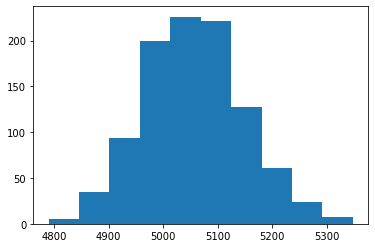

In [13]:
# Let's plot a histogram of the bootstrapped means

plt.hist(possible_means)

In [14]:
# Finally, can we get the 5th percentile and the 95th percentile of the
# bootstrapped means? That would give us our 90% confidence interval
# for the real mean

print(np.percentile(possible_means,5),np.percentile(possible_means,95))

4908.7325 5206.4325
